In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

plt.style.use("seaborn-v0_8")

### Histogram (Quantitative attributes)
- Gives a discretized display of value *frequency*
- Data points are split into discrete/evenly spaced bins; the number of data points in each bin is plotted
- It identifies the distribution and range of an attribute

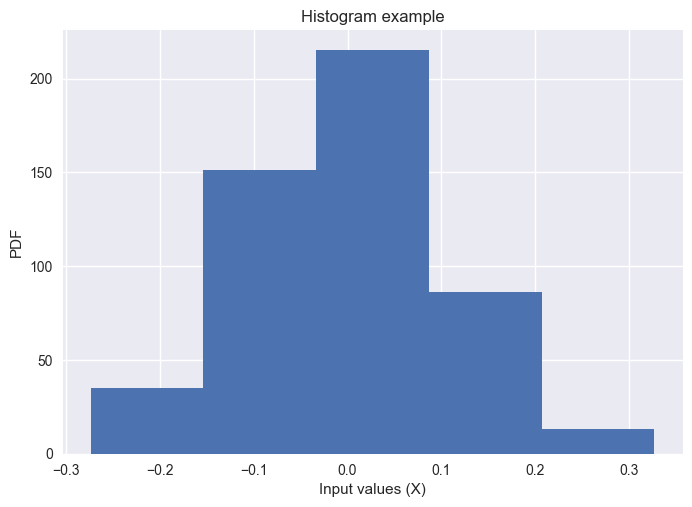

In [18]:
# Example of Probability Density Function (PDF)
# Divides the input into several ("bins") range of values
data = np.random.normal(0, 0.1, 500)
plt.hist(data, 5)
plt.xlabel("Input values (X)")
plt.ylabel("PDF")
plt.title("Histogram example")
plt.show()

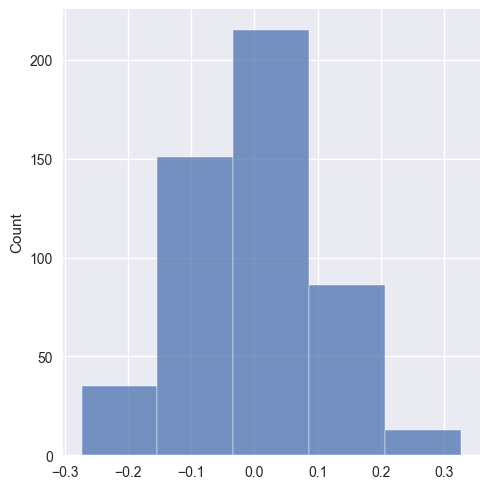

In [19]:
sns.displot(data, bins=5)

### Histogram (Categotical attributes)

<Axes: xlabel='colour'>

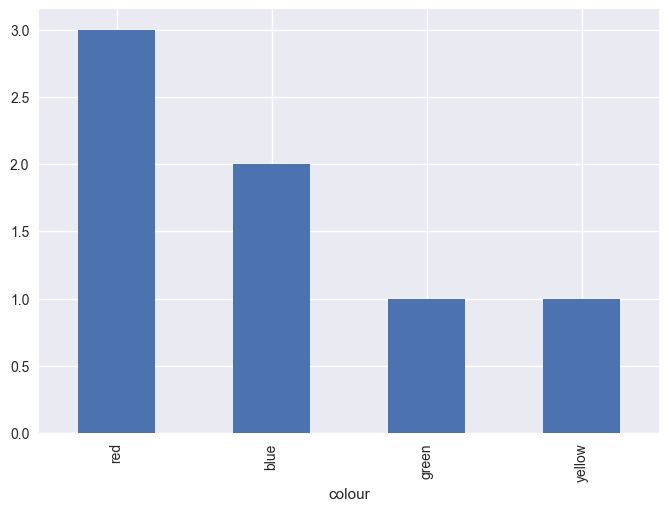

In [20]:
df = pd.DataFrame({"colour": ["red", "blue", "green", "red", "red", "yellow", "blue"]})
df["colour"].value_counts().plot(kind="bar")

### Density Plot
- Quantitative Attribute
- Smoothed, continuous version of a histogram
- Kernel Density Estimate (KDE) shows the probability density function of the variable

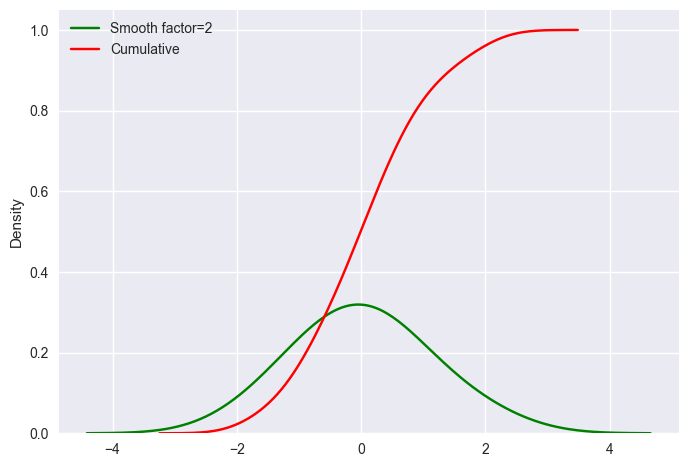

In [21]:
data0 = np.random.normal(0, 1.0, size=(100,))
sns.kdeplot(data0, color="g", bw_adjust=2, label="Smooth factor=2")
sns.kdeplot(data0, color="r", cumulative=True, label="Cumulative")
plt.legend()
plt.show()

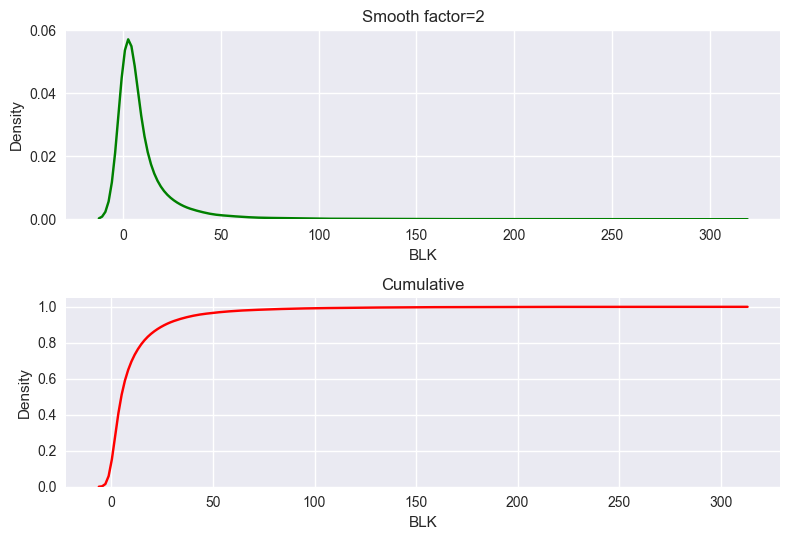

In [22]:
# Subplots
df = pd.read_csv("datasets/nba.csv")
_, (ax1, ax2) = plt.subplots(2)
sns.kdeplot(df["BLK"], ax=ax1, color="g", bw_adjust=2, label="Smooth factor=2")
ax1.set_title("Smooth factor=2")
sns.kdeplot(df["BLK"], ax=ax2, color="r", cumulative=True, label="Cumulative")
ax2.set_title("Cumulative")
plt.tight_layout()  # distance between subplots
plt.show()

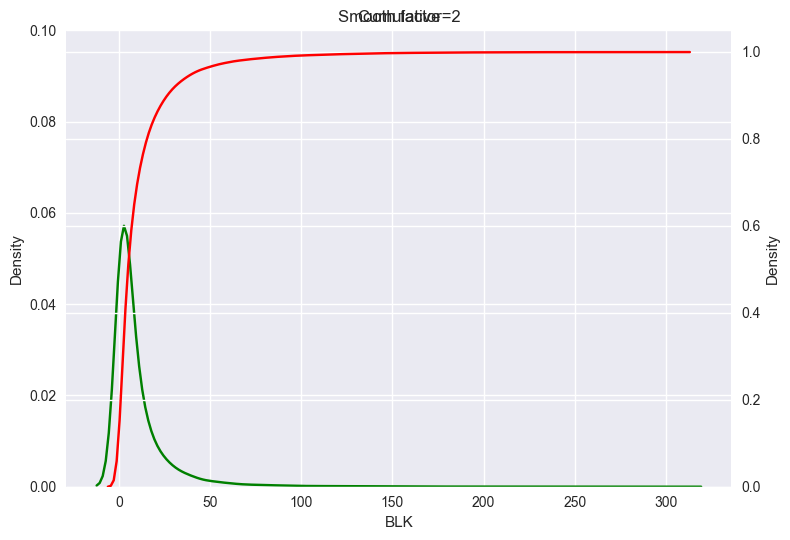

In [23]:
# Subplots
df = pd.read_csv("datasets/nba.csv")
_, ax1 = plt.subplots()
sns.kdeplot(df["BLK"], ax=ax1, color="g", bw_adjust=2, label="Smooth factor=2")
ax1.set_title("Smooth factor=2")
ax1.set_yticks(np.arange(0, 0.12, 0.02))

ax2 = ax1.twinx()

sns.kdeplot(df["BLK"], ax=ax2, color="r", cumulative=True, label="Cumulative")
ax2.set_title("Cumulative")

plt.tight_layout()
plt.show()

### Boxplot
- Quantitative Attribute
- Shows
    - Median: central line
    - First and third quartiles (from 25% to 75% of the data): rectangle
    - max and min values: whiskers on top and bottom (can be set)
    - outliers: points very far away, outside the whiskers
- It identifies the distribution and range of an attribute, have a quick look to its descriptive analysis
- doesn't work if there's a NaN value: make sure you drop/fill them otherwise the plot will be blank

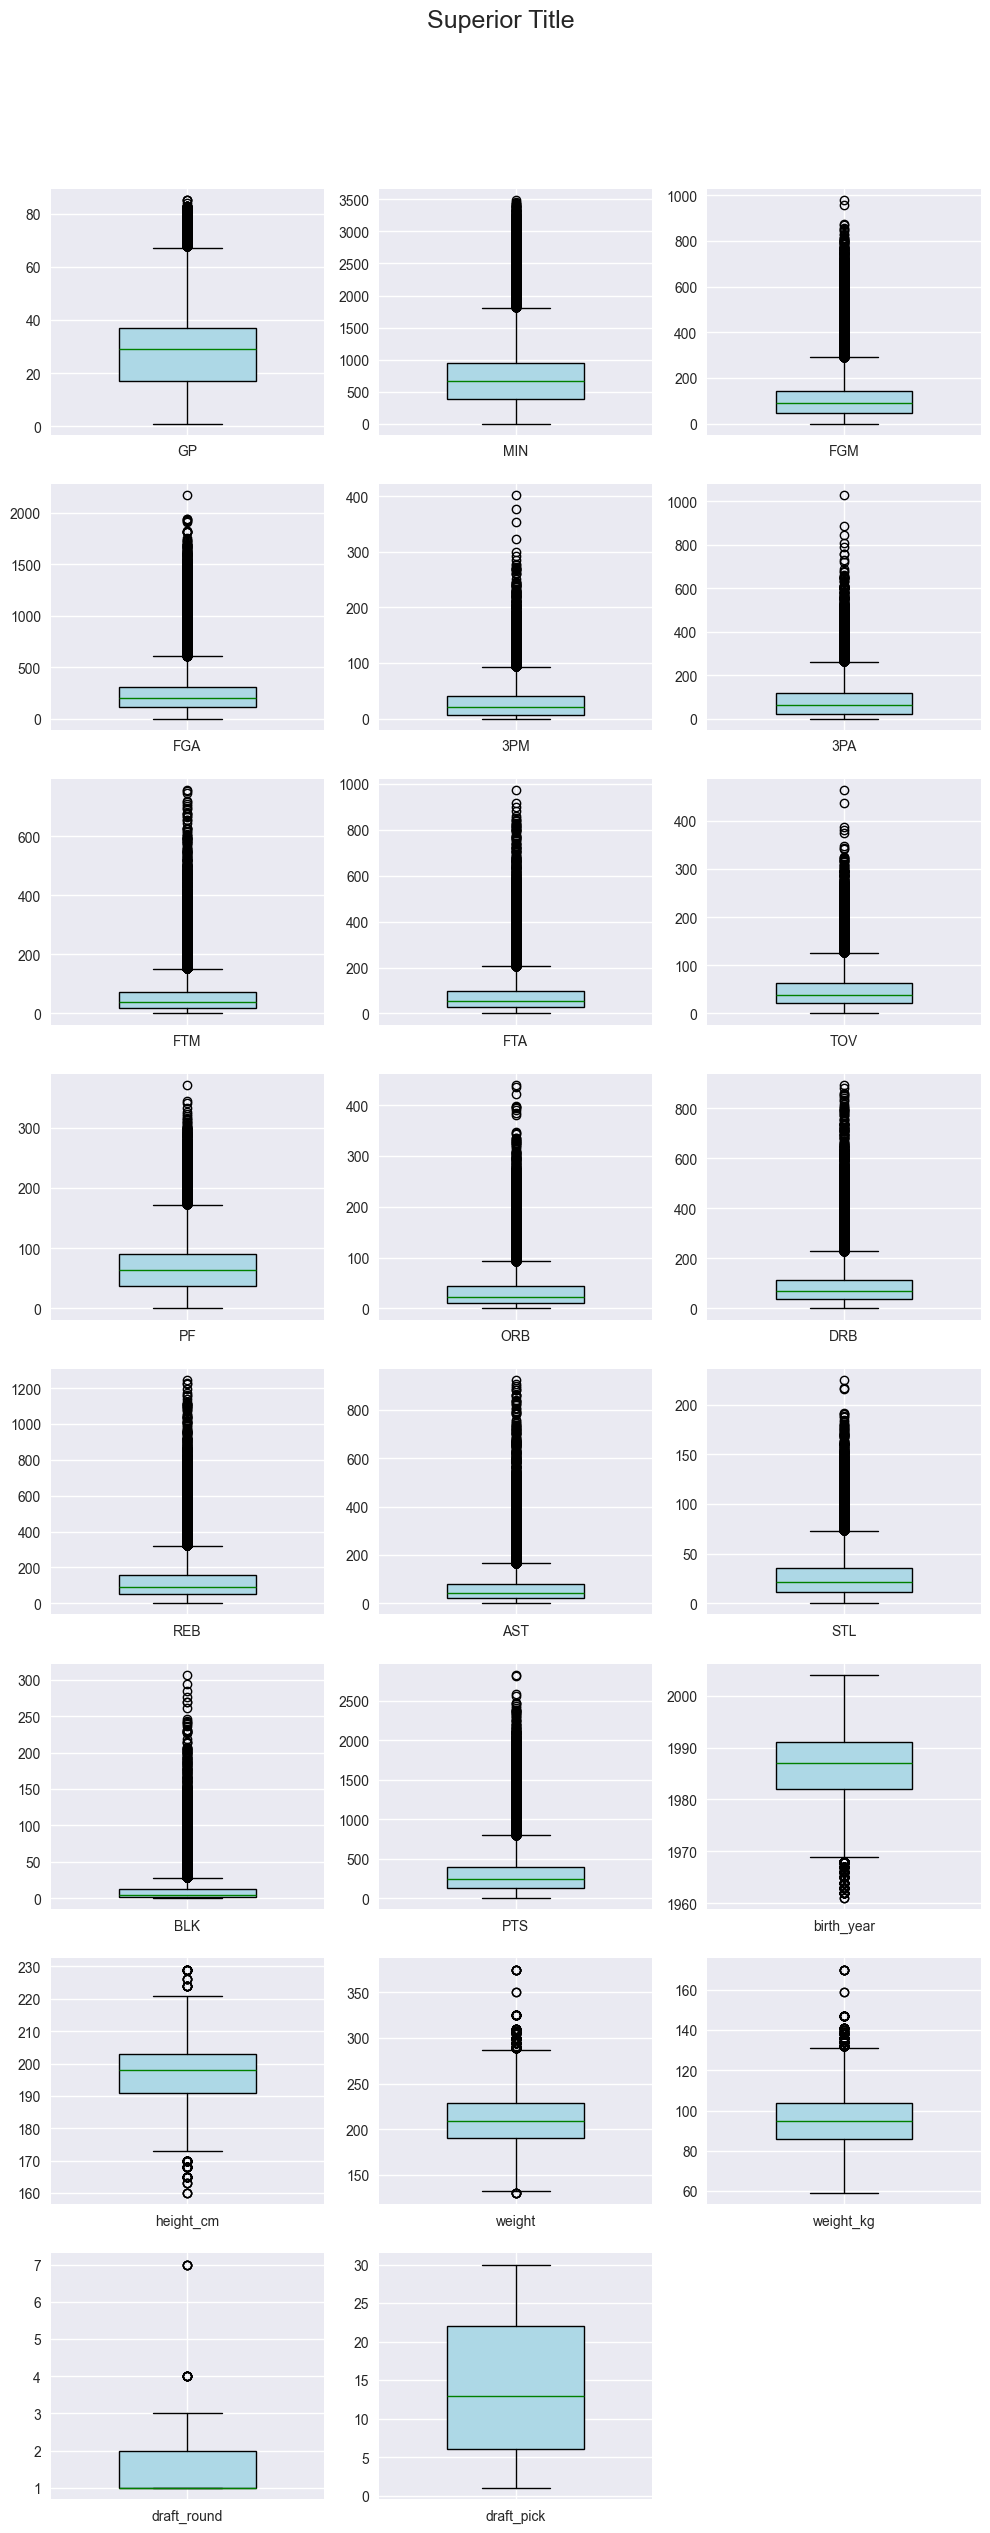

In [24]:
# Single box in multiple plots
df = df.select_dtypes(include="number")

ncols = 3
nrows = (df.columns.size // ncols) + 1
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 30))

fig.suptitle("Superior Title", fontsize=18, y=0.94)

for col, ax in zip(df.columns.tolist(), axs.ravel()):
    ax.boxplot(
        df[col].dropna(),
        labels=[col],
        patch_artist=True,
        flierprops={"markeredgecolor": "k"},
        whiskerprops={"color": "k"},
        capprops={"color": "k"},
        medianprops={"color": "green"},
        boxprops={"color": "k", "facecolor": "lightblue"},
        widths=0.5,
    )

# Remove unused axes
for i in range(df.shape[1], nrows * ncols):
    fig.delaxes(axs[i // ncols, i % ncols])

plt.show()

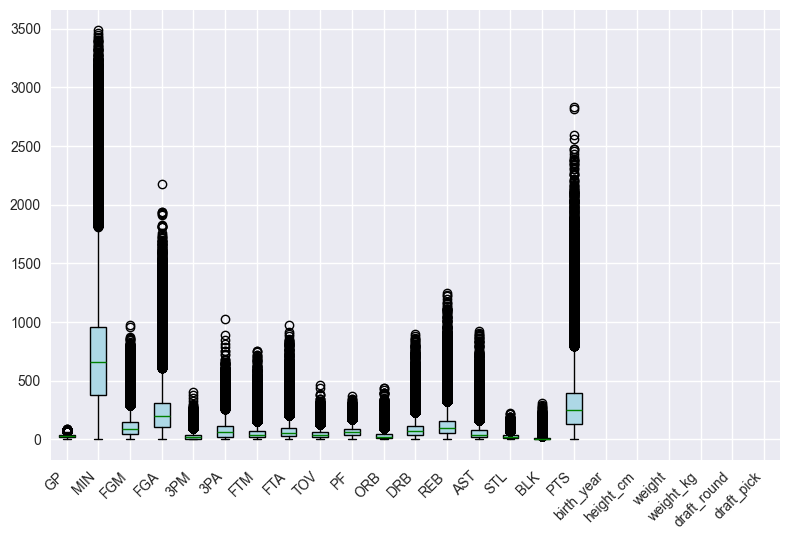

In [25]:
plt.boxplot(
    df.select_dtypes("number"),
    labels=df.columns,
    patch_artist=True,
    flierprops={"markeredgecolor": "k"},
    whiskerprops={"color": "k"},
    capprops={"color": "k"},
    medianprops={"color": "green"},
    boxprops={"color": "k", "facecolor": "lightblue"},
    widths=0.5,
)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Scatter Plot
- Two Quantitative Attributes (> 2 if the points are encoded with different sizes/colors/markers)
- Use Cartesian coordinates to display values on each axis
- Data are displayed as a collection of 2D points
- Identify *correlations among attributes* and Identify *clusters and/or outliers*

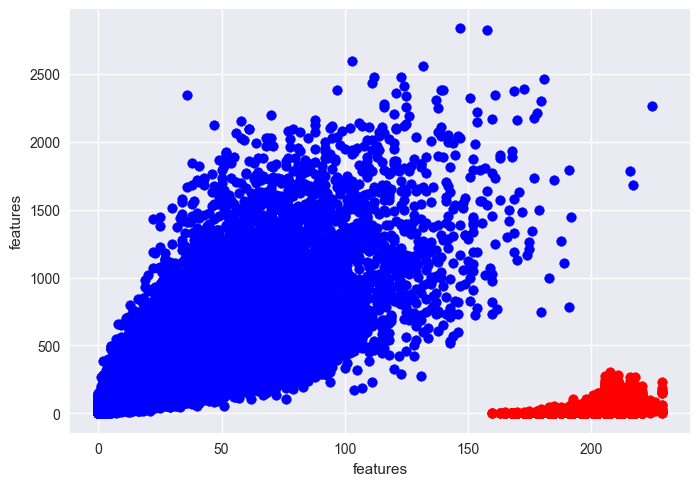

In [26]:
# Multiple scatter, single plot
# x,y: data positions
plt.scatter(df.height_cm, df.BLK, c="r")
plt.scatter(df.STL, df.PTS, c="b")
plt.xlabel("features"), plt.ylabel("features")
plt.show()

### Scatter Plot Matrix
- N Quantitative Attributes
- On the diagonal, it displays a Density Plot of the attribute

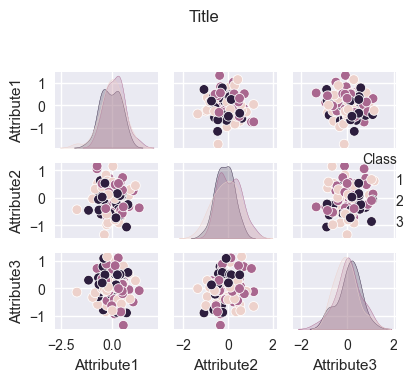

In [27]:
data = np.random.normal(0, 0.5, size=(100, 3))
category = np.random.randint(1, 4, size=(100,))
df = pd.DataFrame(
    {
        "Attribute1": data[:, 0],
        "Attribute2": data[:, 1],
        "Attribute3": data[:, 2],
        "Class": category,
    }
)
sns.pairplot(df, height=1.2, hue="Class").fig.suptitle("Title", y=1.05)
plt.tight_layout()
plt.show()

### LinePlot
- Two Quantitative Attributes OR one Quantitative attribute and one Ordered Key (Time)
- Points connected by straight lines
- Identify trends and evolution over time

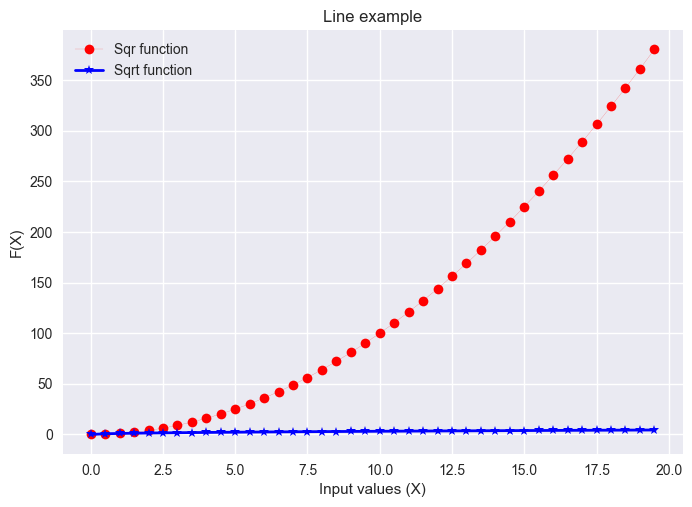

In [28]:
data = np.arange(0.0, 20.0, 0.5)
plt.plot(data, np.power(data, 2), "ro-", linewidth=0.1, label="Sqr function")
plt.plot(data, np.sqrt(data), "b*-", linewidth=2, label="Sqrt function")
plt.xlabel("Input values (X)")
plt.ylabel("F(X)")
plt.title("Line example")
plt.legend(loc="upper left")
plt.show()

### Bar Plot
- One Quantitative attribute AND One Categorical key
- Visual comparison among categorical data
- Each categorical key has a bar, whose height is proportional to the associated quantitative value
- Identify extremes and compare values, not suitable for trends

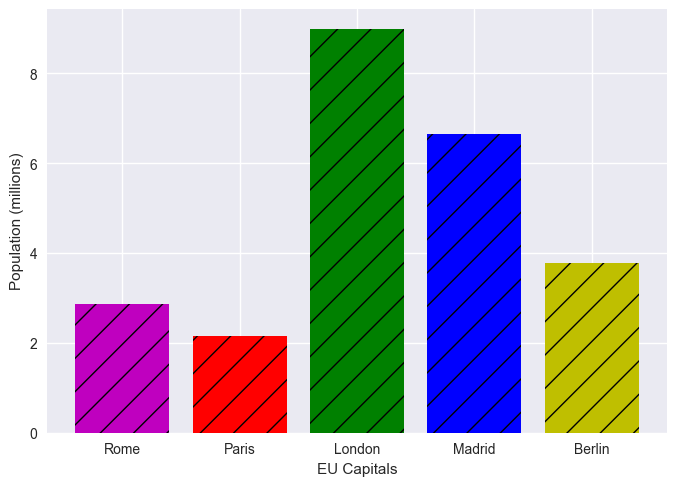

In [29]:
yvalue = [2.873, 2.148, 8.98, 6.642, 3.769]
xvalue = ["Rome", "Paris", "London", "Madrid", "Berlin"]
plt.bar(xvalue, yvalue, color=["m", "r", "g", "b", "y"], hatch="/")
plt.xlabel("EU Capitals")
plt.ylabel("Population (millions)")
plt.show()

### Pie Chart
- One Quantitative attribute AND One Categorical key
- Show numerical proportions in the composition of an attribute
- Arc length is proportional to the quantity it represents. Variants: polar chart, donut chart

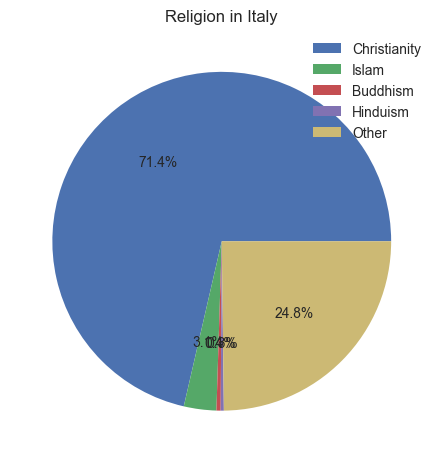

In [30]:
data1 = np.array([71.4, 3.1, 0.4, 0.3, 24.8])
label = ["Christianity", "Islam", "Buddhism", "Hinduism", "Other"]
plt.pie(
    data1,
    autopct="%1.1f%%",
)
plt.legend(label)
plt.title("Religion in Italy")
plt.show()

### (Cluster) Heatmap
- One Quantitative attribute AND Two categorical keys
- Show the magnitude of a phenomenon in two dimensions
- Variation of the quantitative attribute at different cells is denoted by the hue intensity
- Discover patterns and outliers
- Identify correlations between the categorical attributes


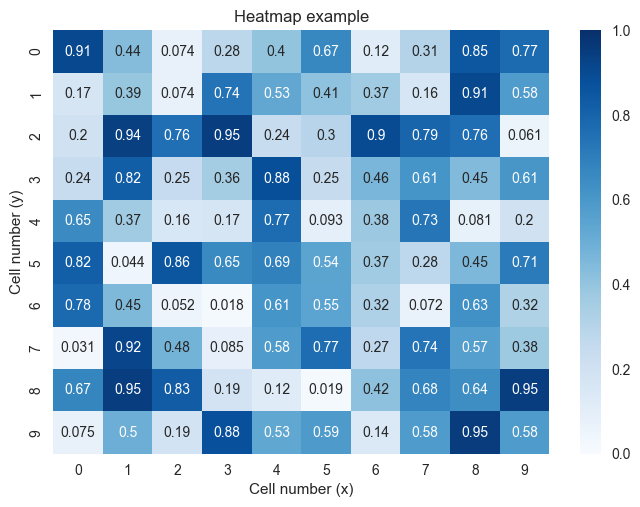

In [31]:
normal_data = np.random.rand(10, 10)
sns.heatmap(normal_data, vmin=0, vmax=1, cmap="Blues", annot=True)
plt.xlabel("Cell number (x)")
plt.ylabel("Cell number (y)")
plt.title("Heatmap example")
plt.show()

### Confusion Matrix
- Used in classification problems to assess where errors in the model were made
- The rows represent the actual classes that should have been the results
- While the columns represent the predictions we have made

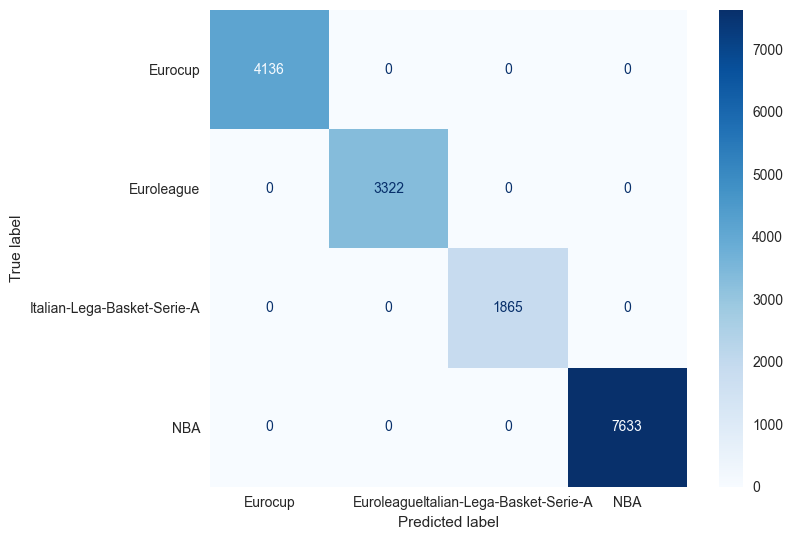

In [32]:
df = pd.read_csv("datasets/nba.csv")
data1 = df[df["League"].isin(["NBA", "Eurocup", "Euroleague", "Italian-Lega-Basket-Serie-A"])]["League"]
ConfusionMatrixDisplay.from_predictions(data1, data1, cmap=plt.cm.Blues)
plt.grid(None)
plt.tight_layout()
plt.show()